In [6]:
from genetracks import Figure, Track, Alignment, Multitrack

# Vectorized sequence alignment diagrams

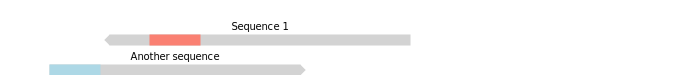

In [2]:
figure = Figure()
t1 = Track(50, 300, direction='f', label="Another sequence", regions=[(50, 100, 'lightblue')])
t2 = Track(110, 410, direction='r', label="Sequence 1", regions=[(150, 200, 'salmon')])
figure.add_track(t1)
figure.add_track(t2)
figure.show()

In this example we pack multiple tracks onto the same row and join them to illustrate gaps:

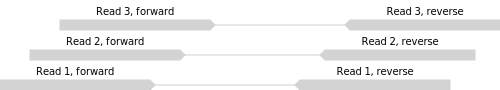

In [7]:
figure = Figure(height=90, size=500)
for i in range(0,3):
    o = i * 30
    e = i * 25
    figure.add_track(Multitrack([
        Track(o, 150 + o, direction='f', label='Read {}, forward'.format(i + 1)),
        Track(300 + e, 450 + e, direction='r', label='Read {}, reverse'.format(i + 1))], join=True))
figure.show()

The `Alignment` class allows us to illustrate the relationship between regions of two different tracks:

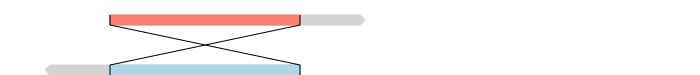

In [4]:
figure = Figure(width=400)
t1 = Track(50, 300, direction='r', regions=[(110, 300, 'lightblue')])
t2 = Track(110, 360, direction='f', regions=[(110, 300, 'salmon')])
figure.add_alignment(Alignment(t1, t2, [(110, 300), (300, 110)]))
figure.show()

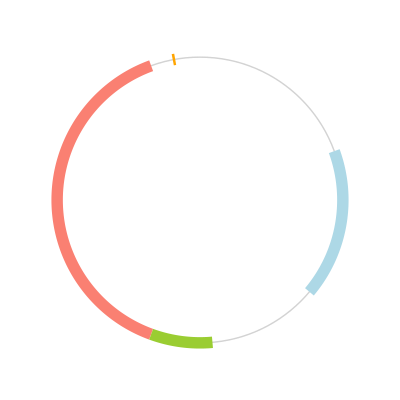

In [5]:
from genetracks import Plasmid, Region

p = Plasmid(360, regions=[Region(100, 101, color='orange'),
                          Region(110, 250, color='salmon'),
                          Region(250, 275, color='yellowgreen'),
                          Region(320, 20, color='lightblue')])
p.show()